In [173]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import seaborn as sns
import numpy as np

In [174]:
amzn_df = pd.read_csv('all_stocks_5yr.csv')

In [175]:
amzn_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [176]:
amzn_df['Name'].value_counts()

Name
ZTS     1259
AAL     1259
AAPL    1259
AAP     1259
ABBV    1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64

In [177]:
amzn_df['Name'].value_counts()['AMZN']

np.int64(1259)

In [178]:
amzn_df = amzn_df.loc[amzn_df['Name'] == 'AMZN']

In [179]:
amzn_df.head()

,date,open,high,low,close,volume,Name
46387,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
46388,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
46389,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
46390,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
46391,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [180]:
amzn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 46387 to 47645
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [181]:
amzn_df['date'] = pd.to_datetime(amzn_df['date'])

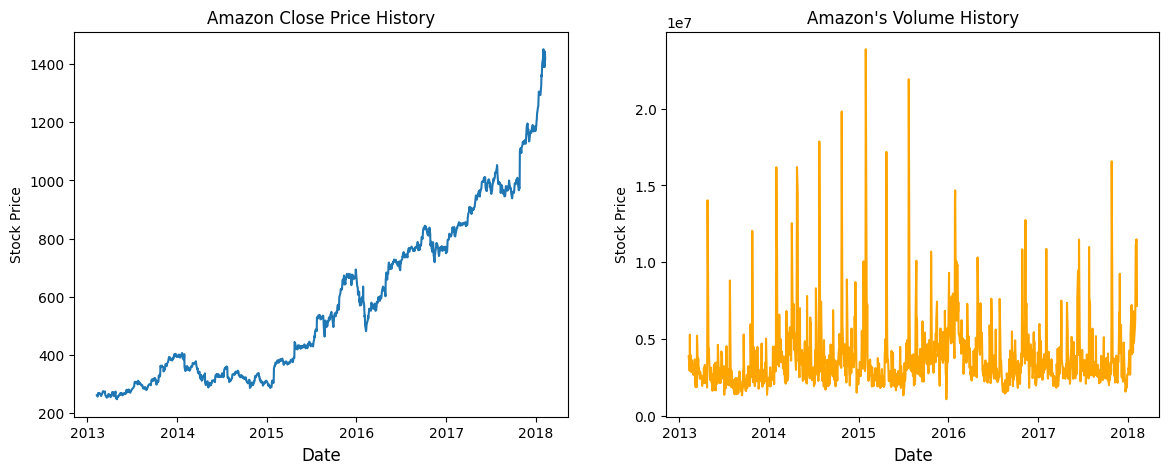

In [182]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amzn_df["date"], amzn_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

ax2.plot(amzn_df["date"], amzn_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()

## Validação padrão treino/teste

In [188]:
split = int(len(amzn_df) * 0.8)

train = amzn_df.iloc[:split]
test  = amzn_df.iloc[split:]

X_train = train[["open"]] 
X_test = test[["open"]] 

y_train = train["close"]  
y_test = test["close"]  

In [189]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9917387233777453

In [190]:
predict = model.predict(X_test)

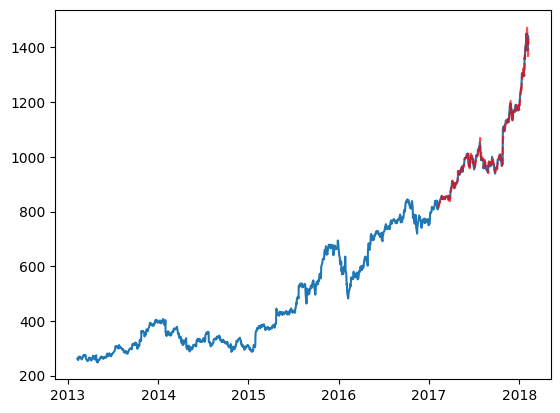

In [191]:
plt.plot(amzn_df['date'], amzn_df['close'])
plt.plot(test['date'], predict, alpha=0.7, color='red', linestyle='--')

plt.show()

In [ ]:
predict2019 = pd.DataFrame()
predict2019['date'] = pd.date_range(start='2018-02-07', end='2019-01-01', freq='D')  

## Validação cruzada

In [187]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

model = LinearRegression()

X = amzn_df[["open", "high", "low", "volume"]]  
y = amzn_df["close"]  

tscv = TimeSeriesSplit(n_splits=3)  

cv_scores = cross_val_score(model, X, y, cv=tscv, scoring='r2')
print(cv_scores.mean())

0.9986656299886699
